<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Code-Setup" data-toc-modified-id="Code-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code Setup</a></span><ul class="toc-item"><li><span><a href="#Acronyms-and-abbreviations" data-toc-modified-id="Acronyms-and-abbreviations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Acronyms and abbreviations</a></span></li></ul></li><li><span><a href="#Establish-Data-Frames" data-toc-modified-id="Establish-Data-Frames-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Establish Data Frames</a></span><ul class="toc-item"><li><span><a href="#Read-items-from-target-model" data-toc-modified-id="Read-items-from-target-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read items from target model</a></span></li><li><span><a href="#Read-organics-data" data-toc-modified-id="Read-organics-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read organics data</a></span></li><li><span><a href="#Imputation-for-density" data-toc-modified-id="Imputation-for-density-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Imputation for density</a></span></li><li><span><a href="#Organics-dataframes" data-toc-modified-id="Organics-dataframes-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Organics dataframes</a></span></li><li><span><a href="#Organics-WF-bins" data-toc-modified-id="Organics-WF-bins-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Organics WF bins</a></span></li></ul></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Preliminary-performance-check" data-toc-modified-id="Preliminary-performance-check-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preliminary performance check</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Hierarchical-Agglomerative-Clustering-(HAC)" data-toc-modified-id="Hierarchical-Agglomerative-Clustering-(HAC)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Hierarchical Agglomerative Clustering (HAC)</a></span><ul class="toc-item"><li><span><a href="#Helper-class-for-selecting-best-ENM-estimator" data-toc-modified-id="Helper-class-for-selecting-best-ENM-estimator-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Helper class for selecting best ENM estimator</a></span></li><li><span><a href="#Pipeline/GridSearch-to-select-n_clusters" data-toc-modified-id="Pipeline/GridSearch-to-select-n_clusters-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Pipeline/GridSearch to select n_clusters</a></span></li><li><span><a href="#Apply-feature-agglomeration-using-optimized-n_clusters" data-toc-modified-id="Apply-feature-agglomeration-using-optimized-n_clusters-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Apply feature agglomeration using optimized n_clusters</a></span></li><li><span><a href="#Concatenate-final-dataframe" data-toc-modified-id="Concatenate-final-dataframe-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Concatenate final dataframe</a></span></li></ul></li></ul></li><li><span><a href="#Core-models" data-toc-modified-id="Core-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Core models</a></span><ul class="toc-item"><li><span><a href="#Clustering,-regression-Model" data-toc-modified-id="Clustering,-regression-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clustering, regression Model</a></span></li><li><span><a href="#PCA,-regression-Model" data-toc-modified-id="PCA,-regression-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA, regression Model</a></span></li><li><span><a href="#Compare-feature-predictivity" data-toc-modified-id="Compare-feature-predictivity-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Compare feature predictivity</a></span></li><li><span><a href="#PCA,-WF-Bins" data-toc-modified-id="PCA,-WF-Bins-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>PCA, WF Bins</a></span></li><li><span><a href="#NEW-ENM-Model-(Clusters)" data-toc-modified-id="NEW-ENM-Model-(Clusters)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>NEW ENM Model (Clusters)</a></span></li><li><span><a href="#NEW-ENM-Model-(PCA)" data-toc-modified-id="NEW-ENM-Model-(PCA)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>NEW ENM Model (PCA)</a></span></li></ul></li></ul></div>

CHANGES FROM 10/28/18:
* It was easier to update the source model code using the target model code as a template.
* Imputation was implemented in 10/28/18. Graphs were updated to include imputed data.
* Removed old/alternate code hidden in comments
* Trying to add cross validation to feature agglomeration (3.3.3)


# Code Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "BLTfigs"

In [5]:
import os
#os.chdir(path)
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory did not exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.')

Figure directory exists.


In [6]:
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

In [7]:
# To enable a specified sound to play
from IPython.display import Audio
sound_file = './data/Glass.wav'

# Add the following to the end of a cell with a long run time
# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

In [8]:
# Shift tab to understand function components
# Type questionmark before function to bring up help

## Acronyms and abbreviations

In [9]:
# arr = array
# df = dataframe
# enm = engineered nanomaterial
# mw = molecular weight
# NOC = not otherwise categorizable
# oecd = Organisation for Economic Co-operation and Development
# prop = property
# PUC = product use category
# wf = weight fraction

# Establish Data Frames

## Read items from target model

In [10]:
# Import data frame headings from target model
enm_cols = []
with open('./data/2018-10-31_final-headers.txt', 'r') as filehandle:  
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentCol = line[:-1]
        # add item to the list
        enm_cols.append(currentCol)
enm_cols

['propMW',
 'propMP',
 'propBP',
 'propDensity',
 'absorbent',
 'anti_adhesive_cohesive',
 'antioxidant',
 'antiredeposition_agent',
 'biocide',
 'brightener',
 'chemical_reaction_regulator',
 'colorant',
 'deodorizer',
 'filler',
 'flavouring_nutrient',
 'hardener',
 'humectant',
 'opacifier',
 'uv_stabilizer',
 'viscosity_modifier',
 'gen_AC',
 'gen_CP',
 'gen_EL',
 'gen_HM',
 'gen_PC',
 'gen_PE',
 'gen_VE',
 'group_childspecific',
 'group_dentalcare',
 'group_deodorant',
 'group_enginemaintenance',
 'group_fabrictreatmentanddye',
 'group_facialcleansingandmoisturizing',
 'group_fungicide',
 'group_generalhouseholdcleaning',
 'group_generalmoisturizing',
 'group_makeupandrelated',
 'group_paintstainandrelatedproducts',
 'group_sunscreen',
 'group_surfacesealers',
 'refined_spray',
 'matrix_F']

In [11]:
Xf_enm = pd.read_csv("./data/Xf_enm.csv", sep=',', header='infer', index_col=0)
Xf_enm.head(4)

,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,chemical_reaction_regulator,colorant,deodorizer,filler,flavouring_nutrient,hardener,humectant,opacifier,uv_stabilizer,viscosity_modifier
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1
1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Read organics data

In [12]:
# Set maximum weight fraction as y array (source label)
y_source = pd.read_csv("./data/WFdata_assignedfeatures.csv", sep=',', header='infer', usecols=[2])
print(y_source.shape)

(29373, 1)


In [13]:
# Read in weight fraction data and potential predictive variables
X_source = pd.read_csv("./data/WFdata_assignedfeatures.csv", sep=',', header='infer', usecols=range(1,88))

# Drop unwanted columns (index, CASRN, WF, product type, chem-props unused in ENM df)
X_source.drop(X_source.columns[[0,1,4,8,9,10,11,14,15,17]], axis=1, inplace=True)

# Rename columns
X_source.rename(columns = {'gencatID':'gen'}, inplace = True)
X_source.rename(columns = {'refined_product_type':'refined'}, inplace = True)
X_source.rename(columns = {'assignedID':'matrix'}, inplace = True)

print(X_source.shape)
#list(X_source.columns.values)

(29373, 77)


In [14]:
# Clean up data in refined column so it's only spray vs NOC
# TODO: May want to reinstate child column(s) later on

# Find/replace sprays
X_source.loc[X_source['refined'].str.contains("spray", na=False) == True, 'refined'] = "spray"

# Find/replace everything else with NOC
X_source.loc[X_source.refined != "spray", 'refined'] = "NOC"

# Check unique values for refined column
X_source.refined.unique()
#X_source.loc[34:38,]

array(['NOC', 'spray'], dtype=object)

In [15]:
# Transform factor data (product categories) into binary columns
X_source=pd.get_dummies(X_source, prefix=["gen","group","refined","matrix"], columns=["gen","group","refined","matrix"])

# Clean up column names
X_source.columns = X_source.columns.str.replace(' ','')
X_source.columns = X_source.columns.str.replace('/','')
X_source.columns = X_source.columns.str.replace('-','')

In [16]:
# Remove all columns not used in ENM df ("enm_cols" list imported previously)
# Temporarily add wf labels
X_source = X_source[enm_cols]
X_source = pd.concat([y_source, X_source], axis=1)

# Delete rows that are missing important chemical property data
X_source = X_source[X_source['propMP'].notnull()] # delete missing data
# Remove outlier lacking density data
X_source = X_source[X_source['propMP'] > -170]

# Delete rows that don't have enough data (ones)
X_source = X_source[X_source.iloc[:,5:].sum(axis=1) > 2]

print(X_source.shape)

(11805, 43)


In [17]:
# Extract wf labels (y) from X_source
y_source = X_source[['maximum_weight_fraction']]
X_source.drop(X_source.columns[[0]], axis=1, inplace=True)
print(y_source.shape)

# Array for organics weight fractions (source label)
yarr_source = np.array(y_source.maximum_weight_fraction)
print(yarr_source.shape)

(11805, 1)
(11805,)


In [18]:
# Preview final main dataframe
X_source.tail(8)

,propMW,propMP,propBP,propDensity,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
29359,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29360,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29361,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29363,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
29364,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
29365,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29366,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
29367,152.149,84.03215,263.941,1.198,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Imputation for density

In [19]:
# How much density data is missing?
print(X_source[~X_source['propDensity'].notnull()].shape)

# Percent of density data missing
len(X_source[~X_source['propDensity'].notnull()])/len(X_source)

(438, 42)


0.03710292249047014

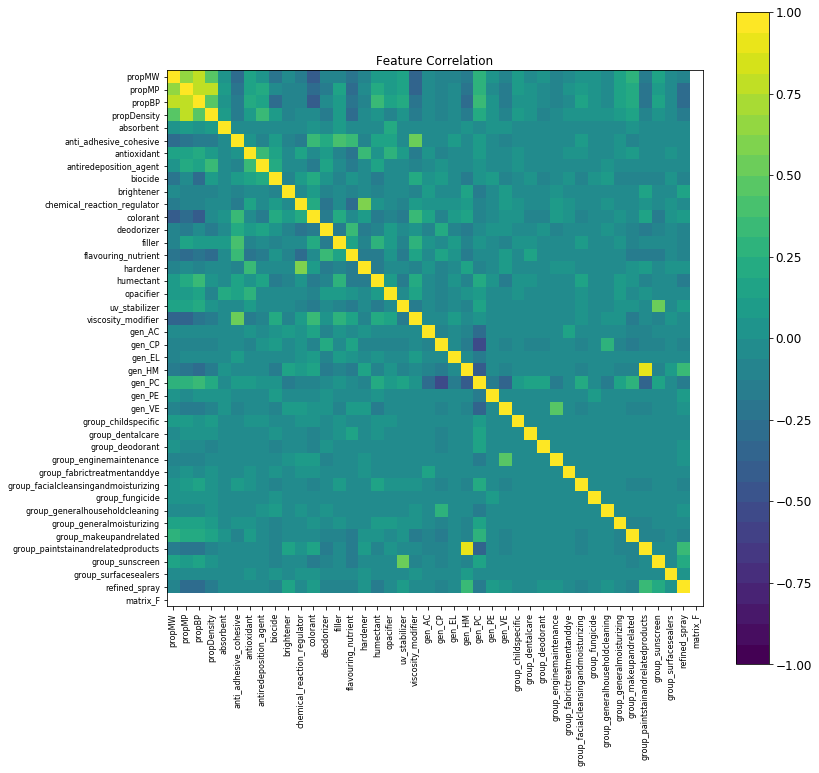

In [20]:
# Check correlations between features to determine 
# best independent variable for imputation

def correlation_matrix(df):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    cmap = cm.get_cmap('viridis', 32) #colorscale='jet'
    cax = ax.imshow(df.corr(), cmap=cmap, vmin=-1, vmax=1)
#    ax.grid(True)
    plt.title('Feature Correlation')
    labels = X_source.columns.tolist()
    ax.set_xticks(range(len(df.columns)))
    ax.set_yticks(range(len(df.columns)))
    ax.set_xticklabels(labels,fontsize=8, rotation=90)
    ax.set_yticklabels(labels,fontsize=8)
    fig.colorbar(cax)
    plt.show()

correlation_matrix(X_source)

In order to find missing values for density, imputation will be performed using linear regression. Melting point has the highest correlation with density and will therefore be used as the independent variable.
Assuming the line of best fit for a set of points is given by:

$y = a + b x$

where:

$b = \Large{\frac{\sum x_i  y_i - n \bar x\bar y )} {\sum (x_i - \bar x)^2}} $

and

$a = \bar y - b \bar x$

* To remove outliers: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

In [212]:
# Find line of best fit for imputation

# MP and density arrays for continuous data
X = np.array(X_source.loc[X_source.propDensity.notnull(), ['propMP']])
Y = np.array(X_source.loc[X_source.propDensity.notnull(), ['propDensity']])

# Solve for 'a' and 'b'
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    return a, b

a, b = best_fit(X, Y)

# MP and density arrays for missing data
X_null = np.array(X_source.loc[X_source.propDensity.isnull(), ['propMP']])
Y_null = b * X_null + a

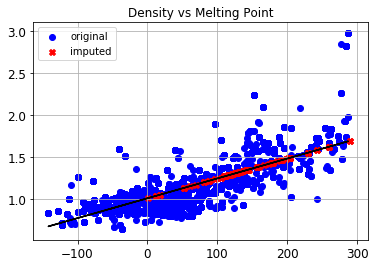

In [213]:
# Plot points and fit line
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, c = 'b', label="original")
ax1.scatter(X_null, Y_null, c = 'r', marker = 'X', label="imputed")
yfit = [a + b * xi for xi in X]
ax1.plot(X, yfit, color='black')

plt.title("Density vs Melting Point")
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [214]:
# Put imputed densities into data frame
for idx in X_source.index:
    if pd.isnull(X_source.loc[idx,"propDensity"]):
        MP = X_source.loc[idx,"propMP"]
        X_source.loc[idx,"propDensity"] = (b * MP + a)

## Organics dataframes

I split up X_source into a few separate dataframes for doing separate hierarchical clustering later on.

In [217]:
# Dataframe for only ENM functional use categories
Xf_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xf_source.drop(Xf_source.columns[0:4], axis=1, inplace=True) # drop chem props
Xf_source.drop(Xf_source.columns[16:], axis=1, inplace=True) # drop product categories
source_func_names=list(Xf_source.columns.values)
source_func_names

['absorbent',
 'anti_adhesive_cohesive',
 'antioxidant',
 'antiredeposition_agent',
 'biocide',
 'brightener',
 'chemical_reaction_regulator',
 'colorant',
 'deodorizer',
 'filler',
 'flavouring_nutrient',
 'hardener',
 'humectant',
 'opacifier',
 'uv_stabilizer',
 'viscosity_modifier']

In [218]:
# Array for only ENM functional use categories
Xf_source=np.array(Xf_source)
print(Xf_source.shape)

(16354, 16)


In [219]:
# Dataframe for only ENM product categories
Xp_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xp_source.drop(Xp_source.columns[0:20], axis=1, inplace=True) # drop chem props and functions
Xp_source.drop(Xp_source.columns[20:], axis=1, inplace=True) # drop matrix categories
#list(Xp_source.columns.values)

In [220]:
# Dataframe for only ENM product categories
Xm_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xm_source.drop(Xm_source.columns[0:40], axis=1, inplace=True) # drop chem props
list(Xm_source.columns.values)

['refined_spray', 'matrix_F']

In [221]:
# Array for only chemical properties
Xc_source=pd.DataFrame(X_source)
# Drop unwanted columns
Xc_source.drop(Xc_source.columns[4:], axis=1, inplace=True)
print(Xc_source.shape)

(16354, 4)


## Organics WF bins

(array([ 219.,   47.,   21.,  123.,  113.,  147., 1283.,  291.,  250.,
        3680., 1122., 4315., 2085.,  869., 1002.,  787.]),
 array([-4.99995657e+00, -4.68745902e+00, -4.37496146e+00, -4.06246390e+00,
        -3.74996634e+00, -3.43746879e+00, -3.12497123e+00, -2.81247367e+00,
        -2.49997611e+00, -2.18747856e+00, -1.87498100e+00, -1.56248344e+00,
        -1.24998589e+00, -9.37488329e-01, -6.24990772e-01, -3.12493214e-01,
         4.34292310e-06]),
 <a list of 16 Patch objects>)

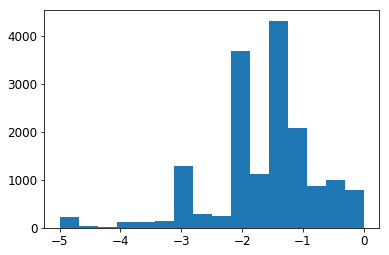

In [222]:
# Log-transformed histogram of weight fraction
plt.hist(np.log10(yarr_source+0.00001), bins=16)

In [223]:
# Define function to assign weight fractions to bins per Isaacs et al. 2016
def bins(row):
    if row['maximum_weight_fraction'] <= 0.01:
        val = 'bottom'
    elif row['maximum_weight_fraction'] > 0.05:
        val = 'top'
    else:
        val = 'middle'
    return val
bin_source = y_source.apply(bins, axis=1)

Text(0.5,1,'Frequency of Organic Weight Fraction Bins')

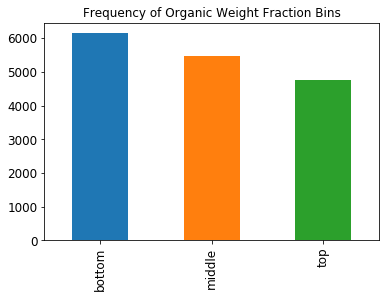

In [224]:
bin_source.value_counts()[['bottom','middle','top']].plot(kind='bar')
plt.title('Frequency of Organic Weight Fraction Bins')

In [225]:
# Use label encoder to make bins compatible with Scikit-Learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Fit the encoder and transform categories into integers
bin_source = le.fit_transform(bin_source)
# Convert a list of integers into their category names
print('[0, 1, 2]')
print(list(le.inverse_transform([0,1,2])))
print('bin_source shape: {}'.format(bin_source.shape))

[0, 1, 2]
['bottom', 'middle', 'top']
bin_source shape: (16354,)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Pre-processing

## Preliminary performance check

In [187]:
# SVC-RBF with all features, normalized
    # Binned weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[0.1, 1, 10, 30]
gamma_set=[0.0001, 0.001, 0.01, 0.1]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 30, 'estimator__gamma': 0.001}
0.5350984468631528


In [ ]:
# SVR-RBF with all features, normalized
    # Continuous weight fractions
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[0.1, 1, 10, 30]
gamma_set=[0.0001, 0.001, 0.01, 0.1]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(X_source,y_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

## PCA

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

***Need to add in cross-validation***

In [188]:
# Scale the data first (i.e., the chemical properties) so everything is from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_source_scaled = scaler.fit_transform(X_source)

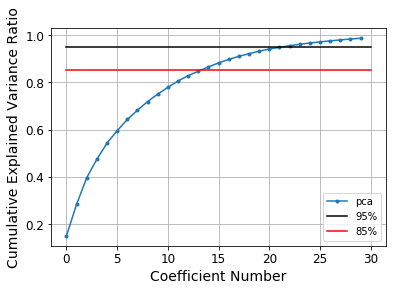

In [189]:
# Figure out number of components to achieve 85% cumulative explained variance
from sklearn import decomposition 
pca=decomposition.PCA(n_components=30)
dim_red_source=pca.fit(X_source_scaled)

fig =plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),'.-',label='pca')
plt.plot([0, 30],[.95,.95],'k',label='95%')
plt.plot([0, 30],[.85,.85],'r',label='85%')
plt.xlabel('Coefficient Number')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.legend()
plt.show()

In [190]:
# Transform/apply PCA
from sklearn import decomposition 
pca = decomposition.PCA(n_components=22)
dim_red_source = pca.fit_transform(X_source_scaled)

## Hierarchical Agglomerative Clustering (HAC)

* Feature Agglomeration sklearn http://scikit-learn.org/stable/modules/generated/sklearn.cluster.FeatureAgglomeration.html
* Alternate approach
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [92]:
# Distance matrix using cosine
# Functions only

from scipy.spatial.distance import squareform, pdist, cosine
from scipy.cluster.hierarchy import dendrogram, linkage

# https://stackoverflow.com/questions/35639571/python-pandas-distance-matrix-using-jaccard-similarity
res_source = 1-pdist(Xf_source.T, 'cosine') # transform to find similarity between features (not datapoints)
distance_source = pd.DataFrame(squareform(res_source), index=source_all_names, columns=source_all_names)

In [93]:
distance_source

,absorbent,anti_adhesive_cohesive,antioxidant,antiredeposition_agent,biocide,brightener,chemical_reaction_regulator,colorant,deodorizer,filler,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_make-upandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
absorbent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041206,0.013345,0.114375,...,0.000000,0.000000,0.000000,0.000000,0.018613,0.000000,0.000000,0.000000,0.000000,0.033723
anti_adhesive_cohesive,0.000000,0.000000,0.176318,0.000000,0.318298,0.000000,0.043374,0.502640,0.401750,0.495197,...,0.158277,0.000000,0.045848,0.125231,0.071479,0.121506,0.053484,0.000000,0.115748,0.368828
antioxidant,0.000000,0.176318,0.000000,0.360955,0.289966,0.000000,0.239760,0.191712,0.241296,0.006392,...,0.090005,0.000000,0.024972,0.108791,0.176839,0.087951,0.041681,0.022443,0.082880,0.283962
antiredeposition_agent,0.000000,0.000000,0.360955,0.000000,0.218271,0.000000,0.000000,0.000000,0.212951,0.000000,...,0.019835,0.000000,0.026609,0.002926,0.004083,0.000000,0.003208,0.000000,0.010680,0.102498
biocide,0.000000,0.318298,0.289966,0.218271,0.000000,0.000000,0.259466,0.446659,0.335431,0.094699,...,0.056282,0.009048,0.110353,0.049819,0.088222,0.058155,0.043408,0.022619,0.133647,0.469589
brightener,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141903,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.189415,0.000000,0.000000,0.157422,0.097349
chemical_reaction_regulator,0.000000,0.043374,0.239760,0.000000,0.259466,0.000000,0.000000,0.347887,0.063382,0.065466,...,0.038908,0.000000,0.037475,0.045331,0.071872,0.129085,0.023716,0.029189,0.107163,0.291119
colorant,0.041206,0.502640,0.191712,0.000000,0.446659,0.141903,0.347887,0.000000,0.300591,0.315752,...,0.106966,0.000000,0.068339,0.138078,0.186018,0.261417,0.050122,0.025652,0.272625,0.662506
deodorizer,0.013345,0.401750,0.241296,0.212951,0.335431,0.000000,0.063382,0.300591,0.000000,0.043367,...,0.088701,0.000000,0.071398,0.084123,0.100852,0.047524,0.044399,0.008827,0.131906,0.481320
filler,0.114375,0.495197,0.006392,0.000000,0.094699,0.000000,0.065466,0.315752,0.043367,0.000000,...,0.169137,0.000000,0.015998,0.110580,0.025422,0.031293,0.026171,0.000000,0.036689,0.238683


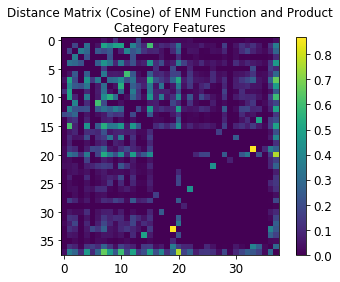

In [94]:
# Functions only
from textwrap import wrap
fig=plt.imshow(distance_source)
#plt.title('Distance Matrix (Cosine) of Function and Product Category Features')
plt.title("\n".join(wrap("Distance Matrix (Cosine) of ENM Function and Product Category Features", 60)))
plt.colorbar()
plt.savefig('./BLTfigs/source_distmatrix_function_cosine.png')

Optimize the number of clusters using the elbow method, which estimates the clustering step where the acceleration of distance growth is largest.

In [95]:
# Generate linkage matrix
# Functions only
from scipy.spatial.distance import squareform, pdist, cosine
from scipy.cluster.hierarchy import dendrogram, linkage

# Z-array with format [idx1, idx2, dist, sample_count]
Z = linkage((Xf_source.T), method='average', metric='cosine')
Z[:5]

array([[ 1.        , 15.        ,  0.39193937,  2.        ],
       [ 6.        , 11.        ,  0.394382  ,  2.        ],
       [ 8.        , 10.        ,  0.4509426 ,  2.        ],
       [ 7.        , 16.        ,  0.47653117,  3.        ],
       [18.        , 19.        ,  0.59520467,  5.        ]])

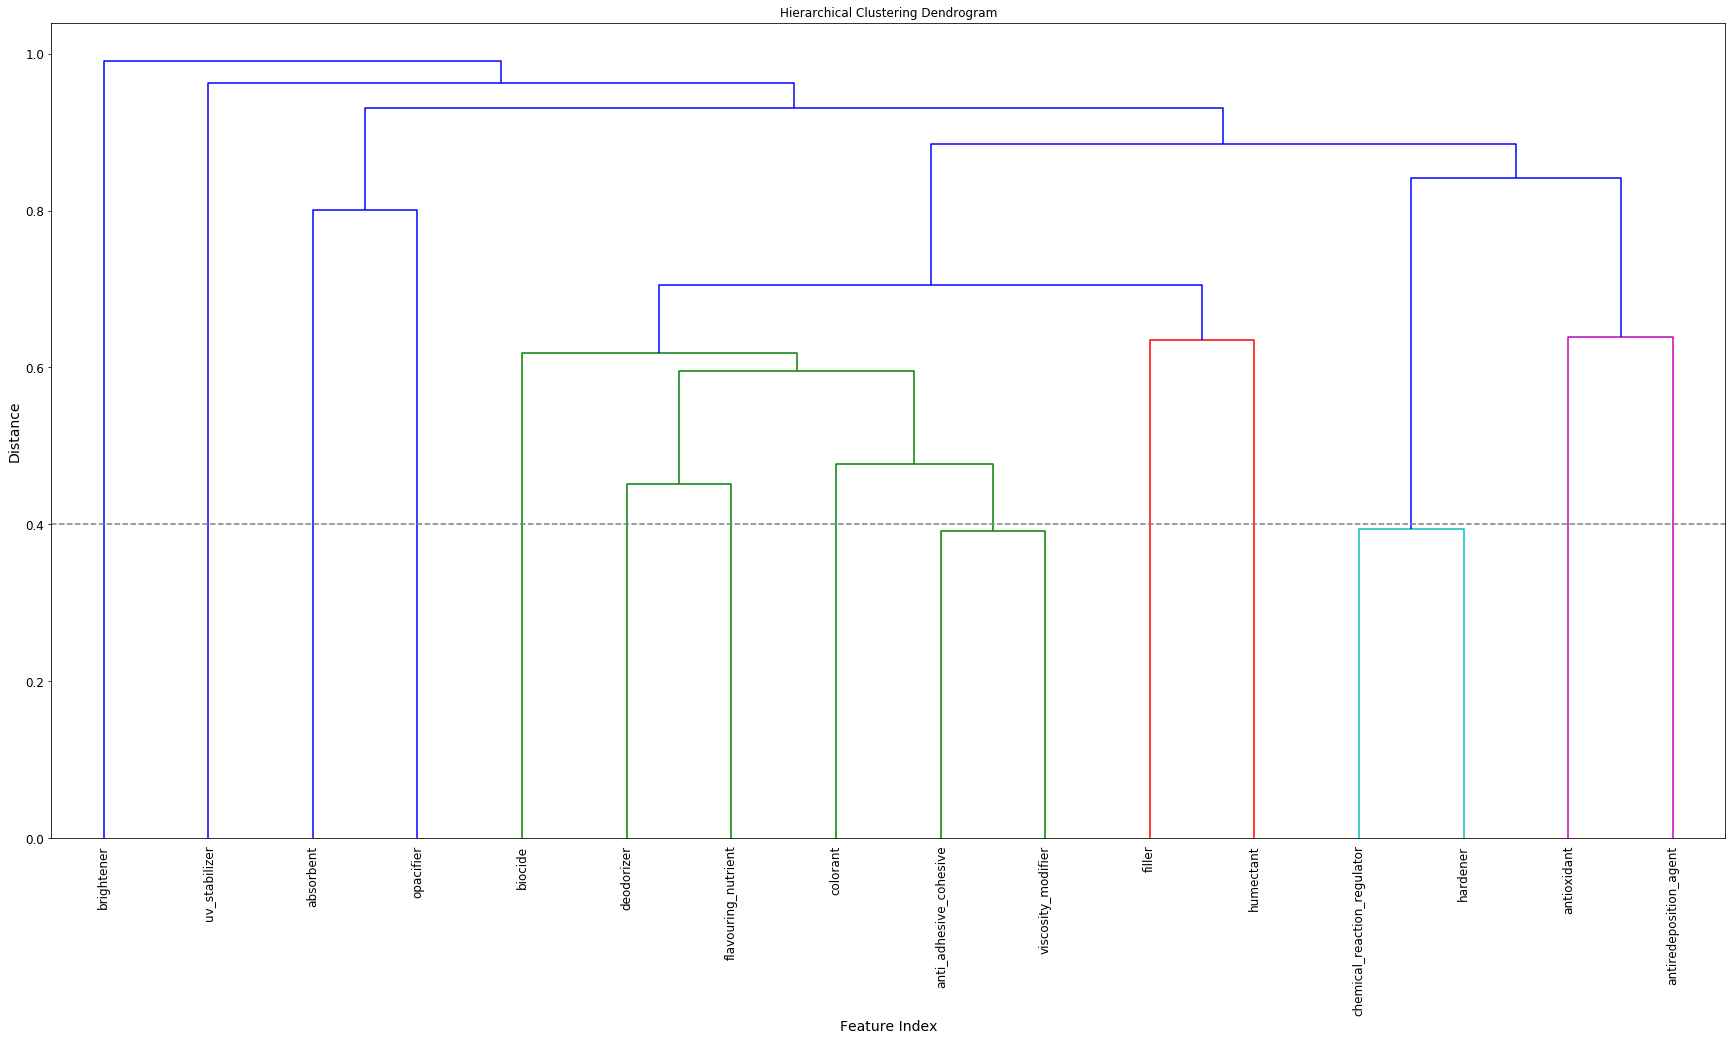

In [96]:
# Calculate full dendrogram
# Functions only

fig=plt.figure(figsize=(30, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    labels=source_func_names
)
plt.axhline(y=0.4, color='gray', linestyle='--')
plt.show()
savepdf(fig,'source_cluster_dendrogram_func-only')

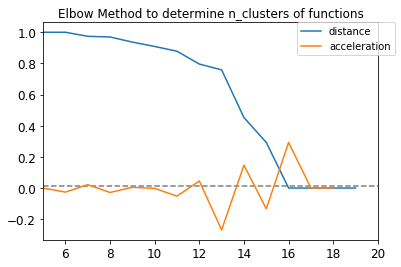

clusters: 16


In [79]:
# Optimize n_clusters with Elbow Method
# Organic functions only

last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]

plt.plot(idxs, last_rev, label='distance')
plt.axhline(y=0.016, color='gray', linestyle='--')
plt.plot(idxs[:-2] + 1, acceleration_rev, label='acceleration')
plt.title('Elbow Method to determine n_clusters of functions')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.xlim([5,20])
plt.savefig('./BLTfigs/source_elbow_PUC-nomatrix.png')
plt.show()

k = acceleration_rev.argmax() + 2
print("clusters:", k)

# look for spikes in orange

Clusters to try: 7,12,14,16

### Helper class for selecting best ENM estimator

Estimator Selection Helper by David Batista
http://www.davidsbatista.net/blog/2018/02/23/model_optimization/

In [80]:
# Set up for grid search across multiple pipelines
from sklearn.model_selection import GridSearchCV

cv=10
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=cv, n_jobs=1, verbose=1, scoring='accuracy', refit=False): # scoring=None
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [96]:
# Define sets of models and their respective parameters to compare
# The first dictionary contains the models to be scored
# while the second contains the parameters for each model

from sklearn.cluster import FeatureAgglomeration
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

cv=5
models_b = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

params_b = {
    'RandomForest': { 'n_estimators': [4,8,12,16]},
    'SVC': [
        {'kernel': ['linear'], 'C': np.logspace(-2,4,20)},
        {'kernel': ['rbf'], 'C': np.logspace(-2,4,20), 'gamma': np.logspace(-6,0,10)},
    ]
}

In [97]:
# Fit gridsearch models to select best estimator
# All ENM features only
helper_b = EstimatorSelectionHelper(models_b, params_b)
helper_b.fit(Xf_source+0.00001, bin_source, n_jobs=3)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVC.
Fitting 10 folds for each of 220 candidates, totalling 2200 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done 2200 out of 2200 | elapsed:    1.6s finished


In [98]:
# Compare performance for estimators (accuracy)
# Function features only
helper_b.score_summary(sort_by='mean_score')

RandomForest
SVC


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
102,SVC,0.444444,0.640873,1,0.200177,1.62378,0.215443,rbf,NaN
112,SVC,0.333333,0.638492,1,0.227326,3.35982,0.215443,rbf,NaN
11,SVC,0.333333,0.638492,1,0.227326,1.62378,NaN,linear,NaN
160,SVC,0.333333,0.624206,0.888889,0.20781,127.427,0.01,rbf,NaN
179,SVC,0.333333,0.624206,0.888889,0.20781,545.559,0.00215443,rbf,NaN
217,SVC,0.333333,0.624206,0.888889,0.20781,10000,0.0001,rbf,NaN
198,SVC,0.333333,0.624206,0.888889,0.20781,2335.72,0.000464159,rbf,NaN
159,SVC,0.444444,0.621825,1,0.196018,127.427,0.00215443,rbf,NaN
216,SVC,0.444444,0.621825,1,0.196018,10000,2.15443e-05,rbf,NaN
187,SVC,0.444444,0.621825,1,0.196018,1128.84,0.0001,rbf,NaN


In [99]:
# Fit gridsearch models to select best estimator
# All organics features only
helper_b = EstimatorSelectionHelper(models_b, params_b)
helper_b.fit(Xp_source, bin_source, n_jobs=3)

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVC.
Fitting 10 folds for each of 220 candidates, totalling 2200 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done 2200 out of 2200 | elapsed:    1.6s finished


In [100]:
# Compare performance for estimators (accuracy)
# Function features only
helper_b.score_summary(sort_by='mean_score')

RandomForest
SVC


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
0,RandomForest,0.333333,0.625198,0.857143,0.157606,NaN,NaN,NaN,4
93,SVC,0.333333,0.607143,0.857143,0.151138,0.78476,1,rbf,NaN
3,RandomForest,0.333333,0.602976,0.857143,0.15001,NaN,NaN,NaN,16
1,RandomForest,0.333333,0.602976,0.857143,0.15001,NaN,NaN,NaN,8
213,SVC,0.333333,0.596032,0.857143,0.150436,4832.93,1,rbf,NaN
203,SVC,0.333333,0.596032,0.857143,0.150436,2335.72,1,rbf,NaN
193,SVC,0.333333,0.596032,0.857143,0.150436,1128.84,1,rbf,NaN
183,SVC,0.333333,0.596032,0.857143,0.150436,545.559,1,rbf,NaN
173,SVC,0.333333,0.596032,0.857143,0.150436,263.665,1,rbf,NaN
163,SVC,0.333333,0.596032,0.857143,0.150436,127.427,1,rbf,NaN


### Pipeline/GridSearch to select n_clusters

Have to run fit with [X + a very small number] so that features with very few ones don't go missing during cross validation. https://stats.stackexchange.com/questions/324732/kernel-density-estimator-kde-with-too-many-zeroes-as-input

In [192]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import FeatureAgglomeration
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn import preprocessing

In [104]:
# Pipeline/GridSearch to select n_clusters for feature agglomeration
# after selecting ideal estimator
# Functions only

# Pipeline
feat = FeatureAgglomeration(affinity="cosine", linkage="average")
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('feat', feat),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
k_set=[8,10,13,16]
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'feat__n_clusters': k_set,
            'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=3)
grid_search.fit(Xf_source+.0001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when cell is done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 3.359818286283781, 'estimator__gamma': 0.11288378916846883, 'feat__n_clusters': 13}
0.6585365853658537


### Apply feature agglomeration using optimized n_clusters

In [227]:
# Apply feature agglomeration based on ENM model
# Functions only

agg = FeatureAgglomeration(n_clusters=13, affinity="cosine", linkage="average")
# Fit feature agglomeration to ENM data
agg.fit(Xf_enm+0.0001)
# Transform source data
Xf_source_red = pd.DataFrame(agg.transform(Xf_source))
print(Xf_source_red.shape)


(16354, 13)


In [233]:
Xf_source_red.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
16334,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16335,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16337,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16338,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16339,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16340,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16341,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16342,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16343,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Concatenate final dataframe

In [230]:
print(Xc_source.shape)
print(Xf_source_red.shape)
print(Xp_source.shape)
print(Xm_source.shape)

(16354, 4)
(16354, 13)
(16354, 20)
(16354, 2)


In [234]:
Xf_source_red.index = Xc_source.index

In [235]:
# Concatenate all clustered and scaled features into new dataframe
XX_source = pd.concat([Xc_source,Xf_source_red,Xp_source,Xm_source], axis=1)
XX_source.tail(10)

,propMW,propMP,propBP,propDensity,0,1,2,3,4,5,...,group_facialcleansingandmoisturizing,group_fungicide,group_generalhouseholdcleaning,group_generalmoisturizing,group_makeupandrelated,group_paintstainandrelatedproducts,group_sunscreen,group_surfacesealers,refined_spray,matrix_F
29360,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
29361,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
29362,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
29363,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
29364,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
29365,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
29366,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
29367,152.149,84.03215,263.941,1.198,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
29368,135.210,-31.78080,203.080,0.930,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
29369,135.210,-31.78080,203.080,0.930,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Core models

## Clustering, regression Model

In [118]:
# Define sets of models and their respective parameters to compare
# The first dictionary contains the models to be scored
# while the second contains the parameters for each model

#from sklearn import model_selection, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

njobs=3
models = {
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR()
}

params = {
    'RandomForest': { 'n_estimators': [4, 8, 12, 16] },
    'SVR': [
        {'kernel': ['linear'], 'C': [1, 10, 30]},
        {'kernel': ['rbf'], 'C': [1, 5, 10, 20, 30, 40, 50], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
    ]
}

In [119]:
# Fit gridsearch models to select best estimator
helper = EstimatorSelectionHelper(models, params)
helper.fit(XX_source_scaled+0.0001, np.log10(yarr_source), n_jobs=n_jobs, scoring='explained_variance') # n_jobs=1 by default

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVR.
Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Done 380 out of 380 | elapsed:    0.5s finished


In [120]:
# Compare performance for estimators
helper.score_summary(sort_by='mean_score')

RandomForest
SVR


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
37,SVR,-0.62249,0.029433,0.468392,0.25752,50,0.0001,rbf,NaN
13,SVR,-0.620176,0.0294046,0.466755,0.256595,5,0.001,rbf,NaN
32,SVR,-0.494288,0.0283195,0.397619,0.209997,40,0.0001,rbf,NaN
27,SVR,-0.377818,0.026185,0.311364,0.162786,30,0.0001,rbf,NaN
22,SVR,-0.24717,0.0219887,0.216835,0.109803,20,0.0001,rbf,NaN
17,SVR,-0.12556,0.0135234,0.125604,0.0590009,10,0.0001,rbf,NaN
8,SVR,-0.125132,0.0134843,0.125293,0.0588247,1,0.001,rbf,NaN
12,SVR,-0.060599,0.00886199,0.0731525,0.0313175,5,0.0001,rbf,NaN
7,SVR,-0.0117708,0.00211383,0.0158261,0.00645745,1,0.0001,rbf,NaN
9,SVR,-1.22213,-0.00198798,0.597689,0.446432,1,0.01,rbf,NaN


## PCA, regression Model

In [121]:
# Fit gridsearch models to select best estimator
helper2 = EstimatorSelectionHelper(models, params)
helper2.fit(dim_red_source, np.log10(yarr_source), n_jobs=n_jobs, scoring='explained_variance') # n_jobs=1 by default

Running GridSearchCV for RandomForest.
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Running GridSearchCV for SVR.
Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Done 380 out of 380 | elapsed:    0.5s finished


In [122]:
# Compare performance for estimators
helper2.score_summary(sort_by='mean_score')

RandomForest
SVR


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,estimator,min_score,mean_score,max_score,std_score,C,gamma,kernel,n_estimators
32,SVR,-0.498523,0.0321473,0.416344,0.2158,40,0.0001,rbf,NaN
37,SVR,-0.62239,0.0317421,0.47422,0.260206,50,0.0001,rbf,NaN
13,SVR,-0.621387,0.0317064,0.473894,0.259846,5,0.001,rbf,NaN
27,SVR,-0.374299,0.0291626,0.328704,0.16597,30,0.0001,rbf,NaN
22,SVR,-0.247183,0.0255942,0.2301,0.113148,20,0.0001,rbf,NaN
17,SVR,-0.127033,0.0149769,0.129502,0.0606043,10,0.0001,rbf,NaN
8,SVR,-0.1266,0.0148968,0.128834,0.0603578,1,0.001,rbf,NaN
12,SVR,-0.0612442,0.00999065,0.0759484,0.0324261,5,0.0001,rbf,NaN
7,SVR,-0.0118853,0.00246785,0.0173036,0.0068765,1,0.0001,rbf,NaN
9,SVR,-1.21769,0.00236644,0.588368,0.447092,1,0.01,rbf,NaN


In [123]:
# Pipeline/GridSearch to find best optimized model
# after selecting ideal estimator

# Pipeline
estimator = SVR(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=[30,35,40,35]
gamma_set=[0.00003,0.0001,0.0003,0.001]

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
#grid_search.fit(XX,y_log)
grid_search.fit(dim_red_source+.0001,np.log10(yarr_source))
print(grid_search.best_params_)
print(grid_search.best_score_)

{'estimator__C': 40, 'estimator__gamma': 0.0003}
0.016344596124322503


## Compare feature predictivity

In [159]:
# SVR-RBF with WF bins
    # Function features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xf_source+0.0001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 1.623776739188721, 'estimator__gamma': 0.23357214690901212}
0.634146341463


In [160]:
# SVR-RBF with WF bins
    # Product category features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xp_source+0.0001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.78475997035146106, 'estimator__gamma': 0.48329302385717521}
0.585365853659


In [161]:
# SVR-RBF with WF bins
    # Chemical property features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xc_source+0.0001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 61.584821106602604, 'estimator__gamma': 1.0}
0.59756097561


In [113]:
# SVR-RBF with WF bins
    # Chemical property features
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(Xm_source+0.0001,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.4832930238571752}
0.4878048780487805


## PCA, WF Bins

In [108]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 14.38449888287663, 'estimator__gamma': 0.012742749857031322}
0.6463414634146342


In [109]:
# SVR-RBF with all features, normalized
    # ENM weight fractions (PCA)
    # Explained variance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight=None)
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='explained_variance', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.7847599703514611, 'estimator__gamma': 0.11288378916846883}
0.31160725453408383


In [507]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf', C=3, gamma=0.1))
     ])
bestpipe.fit(XX_source,bin_source)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [513]:
# Predictions for ENM WF
y_source_predict=bestpipe.predict(XX_source) 

(55,)


In [515]:
# Accuracy score of model
from sklearn.metrics import accuracy_score
accuracy_score(bin_source, y_source_predict, normalize=True, sample_weight=None)

0.81818181818181823

In [155]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[31  1  0]
 [ 4 10  0]
 [ 2  3  4]]
Normalized confusion matrix
[[ 0.97  0.03  0.  ]
 [ 0.29  0.71  0.  ]
 [ 0.22  0.33  0.44]]


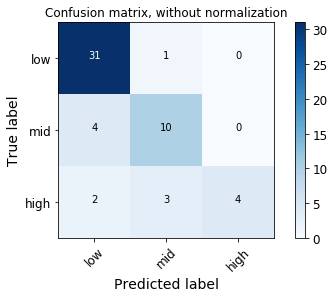

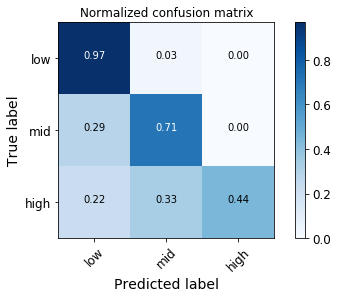

In [556]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y_source_predict)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (Clusters)

In [124]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(XX_source,bin_source) #dim_red_source
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.scoring)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 61.584821106602604, 'estimator__gamma': 0.012742749857031322}
0.6219512195121951
accuracy


Essentially leave one out cross validation, slight biases, might be overfitting

In [125]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=61.584821, gamma=0.01274275))
     ])

In [126]:
# Make a confusion matrix to summarize accuracy across labels
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [127]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_source)
y=np.array(bin_source)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_source_predict=bestpipe.predict(X_test)
    y[test_index]=y_source_predict
    cnf_matrix2+= confusion_matrix(y_test, y_source_predict);

In [128]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[29  2  5]
 [11 15  3]
 [ 3  2 12]]
Normalized confusion matrix
[[0.81 0.06 0.14]
 [0.38 0.52 0.1 ]
 [0.18 0.12 0.71]]


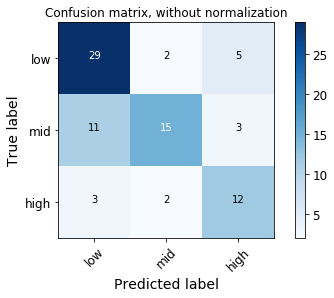

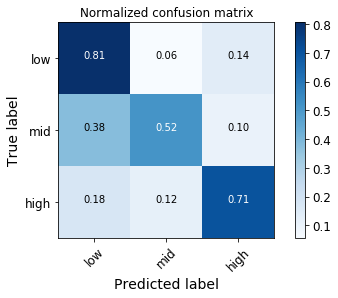

In [129]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## NEW ENM Model (PCA)

In [130]:
# SVR-RBF with all features, normalized
    # ENM weight fractions
    # Accuracy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Pipeline
estimator = SVC(kernel='rbf',class_weight='balanced')
prepipe = Pipeline([
#    ('scale', MinMaxScaler()),
    ('estimator', estimator)
])

# Set parameter ranges for gridsearch
cv=10
n_jobs=3
c_set=np.logspace(-2,4,20)
gamma_set=np.logspace(-6,0,20)

# Gridsearch
param_grid={'estimator__C': c_set,
            'estimator__gamma': gamma_set
           }
grid_search=GridSearchCV(prepipe,param_grid,cv=cv,scoring='accuracy', n_jobs=n_jobs, pre_dispatch=2*n_jobs)
grid_search.fit(dim_red_source,bin_source)
print(grid_search.best_params_)
print(grid_search.best_score_)

# Play sound when done running
Audio(url=sound_file, autoplay=True)

{'estimator__C': 0.37926901907322497, 'estimator__gamma': 0.11288378916846883}
0.5975609756097561


In [132]:
# Final pipeline
bestpipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('estimator', SVC(kernel='rbf',class_weight='balanced', C=0.379269, gamma=0.112884))
     ])
bestpipe.fit(dim_red_source,bin_source)

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('estimator', SVC(C=0.379269, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.112884, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [133]:
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=17,shuffle=True)
cnf_matrix2=np.zeros([3,3])
X=np.array(XX_source)
y=np.array(bin_source)
for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bestpipe.fit(X_train,y_train)
    y_source_predict=bestpipe.predict(X_test)
    y[test_index]=y_source_predict
    cnf_matrix2+= confusion_matrix(y_test, y_source_predict);

In [134]:
cnf_matrix=cnf_matrix2.astype(np.int)

Confusion matrix, without normalization
[[31  4  1]
 [13 13  3]
 [ 5  6  6]]
Normalized confusion matrix
[[0.86 0.11 0.03]
 [0.45 0.45 0.1 ]
 [0.29 0.35 0.35]]


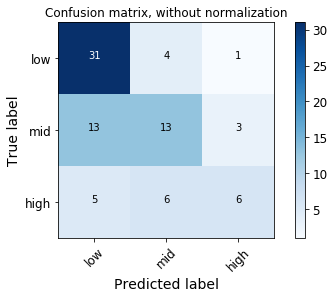

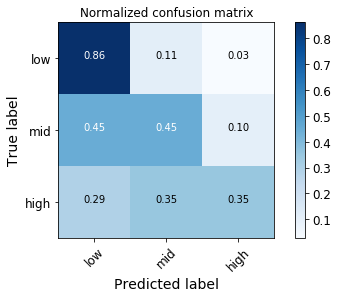

In [135]:
# Define confusion matrix
cnf_matrix = confusion_matrix(bin_source, y)

np.set_printoptions(precision=2)
class_names=["low","mid","high"]

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [153]:
# TODO: correlation matrix of features vs 
source_corr = pd.concat(XX_source,y_source.apply(np.log10(), axis=1)) #np.log10(yarr_source)
plt.matshow(source_corr.corr())

ValueError: invalid number of arguments